## Preparing

In [1]:
%run ./Setting_Process.ipynb

  Using cached https://files.pythonhosted.org/packages/85/b2/2ea329a07bbc0c7227eef84ca89ffd6895e7ec237d6c0b26574d56103e53/translate-3.5.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/2c/88/966da62ec93566c221bf8bf0c1b7f04e70f002960a98da05d3fd8bc3b2e7/pre_commit-2.7.1-py2.py3-none-any.whl


  Found existing installation: PyYAML 3.13
Cannot uninstall 'PyYAML'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


## Set Data

In [2]:
df_review = pd.read_csv('./review_complete.csv')

In [3]:
np.random.seed(10)

In [4]:
randomization = np.random.choice(2,df_review.shape[0] , p=[0.8, 0.2])

In [5]:
synopses = list(df_review['comments'].values.astype('U'))
review = []
for i in range(len(synopses)):
    if randomization[i] == 1:
        review.append(synopses[i])
    

In [6]:
len(review)

23540

In [7]:
def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [8]:
normalized_toy_corpus = normalize_corpus(review)

## Topic Modeling - Bag of words

In [9]:
bow_vectorizer = CountVectorizer()
bow_toy_corpus = bow_vectorizer.fit_transform(normalized_toy_corpus)
bow_feature_names_toy_corpus = bow_vectorizer.get_feature_names()

In [10]:
bow_table = pd.DataFrame(data = bow_toy_corpus.todense(), columns = bow_feature_names_toy_corpus)

In [11]:
no_topics = 5
doc_topic_prior_toy = 0.5  # alpha > 0
topic_word_prior_toy = 0.5 # beta > 0
lda_toy_corpus = LatentDirichletAllocation(n_components=no_topics, 
                                           doc_topic_prior = doc_topic_prior_toy,
                                           topic_word_prior = topic_word_prior_toy).fit(bow_toy_corpus)

In [12]:
no_top_words = 10
display_topics(lda_toy_corpus, bow_feature_names_toy_corpus, no_top_words)

Topic 0:
home house stay boston room lovely beautiful host us like
Topic 1:
room bed us night apartment place bathroom stay really kitchen
Topic 2:
walk boston place close apartment great stay easy restaurant location
Topic 3:
great place stay location clean host would recommend definitely nice
Topic 4:
stay need everything place clean us boston host room question


In [13]:
topic_words = get_topic_words(vectorizer = bow_vectorizer, 
                              lda_model = lda_toy_corpus, 
                              n_words = no_top_words)
# pd.DataFrame(topic_words, 
#              columns = ["word_" + str(i) for i in range(no_top_words)],
#              index = ["Topic_" + str(i) for i in range(len(topic_words))]) 

In [14]:
word_weights = lda_toy_corpus.components_ / lda_toy_corpus.components_.sum(axis=1)[:, np.newaxis]
topic_1_words = pd.DataFrame(data = word_weights[0], index = bow_feature_names_toy_corpus)
topic_2_words = pd.DataFrame(data = word_weights[1], index = bow_feature_names_toy_corpus)
tw = pd.concat([topic_1_words,topic_2_words],axis = 1)
# tw.T

In [15]:
word_weights = lda_toy_corpus.components_ / lda_toy_corpus.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T, 
                               index = bow_feature_names_toy_corpus, 
                               columns = ["Topic_" + str(i) for i in range(no_topics)])
# word_weights_df.head(10)

In [16]:
lda_news_output = lda_toy_corpus.transform(bow_toy_corpus)

In [17]:
doc_names = ["Doc_" + str(i) for i in range(len(normalized_toy_corpus))]
topic_names = ["Topic_" + str(i) for i in range(no_topics)]
df_document_topic = pd.DataFrame(np.round(lda_news_output, 4), columns=topic_names, index=doc_names)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
#df_document_topic[:10]

In [20]:
pyLDAvis.enable_notebook()
visualization_panel = pyLDAvis.sklearn.prepare(lda_toy_corpus, bow_toy_corpus, bow_vectorizer, mds='tsne')
visualization_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      -36.478027   85.039070       1        1  24.015094
2     -189.229691   23.745749       2        1  23.357894
0      -35.862171 -137.548462       3        1  18.927135
3       89.538589  -30.209082       4        1  18.214128
4     -200.680344 -146.638962       5        1  15.485750, topic_info=      Category          Freq         Term         Total  loglift  logprob
term                                                                     
4959   Default  13311.000000        great  13311.000000  30.0000  30.0000
6647   Default   8169.000000     location   8169.000000  29.0000  29.0000
8371   Default  12391.000000        place  12391.000000  28.0000  28.0000
5341   Default   3237.000000         home   3237.000000  27.0000  27.0000
12014  Default   4561.000000         walk   4561.000000  26.0000  26.0000
5428   Default   3149.000000        house   3149.000000  25.0000  25.0000
10513  Default  13355.000000         stay  13355.000000  24.0000  24.0000
2234   Default   7918.000000        clean   7918.000000  23.0000  23.0000
5401   Default   5974.000000         host   5974.000000  22.0000  22.0000
9023   Default   4220.000000    recommend   4220.000000  21.0000  21.0000
12317  Default   5629.000000        would   5629.000000  20.0000  20.0000
11788  Default   3755.000000           us   3755.000000  19.0000  19.0000
2281   Default   3237.000000        close   3237.000000  18.0000  18.0000
9289   Default   2175.000000   restaurant   2175.000000  17.0000  17.0000
4015   Default   3567.000000   everything   3567.000000  16.0000  16.0000
3096   Default   2941.000000   definitely   2941.000000  15.0000  15.0000
8832   Default   1022.000000     question   1022.000000  14.0000  14.0000
7483   Default   3561.000000         need   3561.000000  13.0000  13.0000
1536   Default   7927.000000       boston   7927.000000  12.0000  12.0000
9268   Default    877.000000      respond    877.000000  11.0000  11.0000
5282   Default   1886.000000       highly   1886.000000  10.0000  10.0000
3492   Default   1440.000000     downtown   1440.000000   9.0000   9.0000
3382   Default   1289.000000     distance   1289.000000   8.0000   8.0000
7179   Default   1875.000000       minute   1875.000000   7.0000   7.0000
10504  Default   1291.000000      station   1291.000000   6.0000   6.0000
2069   Default   2671.000000        check   2671.000000   5.0000   5.0000
1253   Default   1965.000000    beautiful   1965.000000   4.0000   4.0000
3632   Default   3854.000000         easy   3854.000000   3.0000   3.0000
6732   Default   1545.000000       lovely   1545.000000   2.0000   2.0000
493    Default   1401.000000       airbnb   1401.000000   1.0000   1.0000
...        ...           ...          ...           ...      ...      ...
5240    Topic5    499.152899         help    743.933044   1.4662  -5.1294
7025    Topic5    420.987122         meet    633.705105   1.4563  -5.2997
1050    Topic5    476.592014    available    752.655146   1.4083  -5.1756
7483    Topic5   1764.866307         need   3561.577747   1.1631  -3.8665
8840    Topic5    801.247415        quick   1435.476360   1.2822  -4.6561
4015    Topic5   1702.837968   everything   3567.370905   1.1257  -3.9023
289     Topic5    526.454822  accommodate    919.105594   1.3080  -5.0761
3182    Topic5    290.367451     describe    442.947253   1.4429  -5.6712
4114    Topic5    774.943900   experience   1627.099009   1.1235  -4.6895
10818   Topic5    447.449578         sure    801.793946   1.2820  -5.2387
4379    Topic5    528.916478        first   1014.924207   1.2135  -5.0715
11788   Topic5   1382.357822           us   3755.593748   0.8658  -4.1108
4000    Topic5    285.489531         ever    453.760023   1.4019  -5.6881
10513   Topic5   2794.470904         stay  13355.683080   0.3010  -3.4069
11188   Topic5    960.347646         time   2840.361962   0.7809  -4.4750

## Topic Modeling - TF-IDF

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', norm = 'l2')
tfidf_toy_corpus = tfidf_vectorizer.fit_transform(normalized_toy_corpus)
tfidf_feature_names_toy_corpus = tfidf_vectorizer.get_feature_names()

In [22]:
tfidf_table = pd.DataFrame(data = tfidf_toy_corpus.todense(), columns = tfidf_feature_names_toy_corpus)

In [23]:
no_topics = 5
doc_topic_prior_toy = 0.5  # alpha > 0
topic_word_prior_toy = 0.5 # beta > 0
lda_tfidf_corpus = LatentDirichletAllocation(n_components=no_topics, 
                                           doc_topic_prior = doc_topic_prior_toy,
                                           topic_word_prior = topic_word_prior_toy).fit(tfidf_toy_corpus)

In [42]:
no_top_words = 10
display_topics(lda_tfidf_corpus, tfidf_feature_names_toy_corpus, no_top_words)

Topic 0:
great location place clean stay nice good host close perfect
Topic 1:
spot public place great transportation simple transit convenient boris stay
Topic 2:
check room day street bed little night bathroom apartment parking
Topic 3:
host stay wonderful beautiful recommend lovely apartment highly best boston
Topic 4:
home boston stay house walk love neighborhood enjoy restaurant place


In [25]:
topic_words_idf = get_topic_words(vectorizer = tfidf_vectorizer, 
                              lda_model = lda_tfidf_corpus, 
                              n_words = no_top_words)

In [26]:
word_weights = lda_tfidf_corpus.components_ / lda_tfidf_corpus.components_.sum(axis=1)[:, np.newaxis]
topic_1_words = pd.DataFrame(data = word_weights[0], index = tfidf_feature_names_toy_corpus)
topic_2_words = pd.DataFrame(data = word_weights[1], index = tfidf_feature_names_toy_corpus)
tw = pd.concat([topic_1_words,topic_2_words],axis = 1)

In [27]:
word_weights = lda_tfidf_corpus.components_ / lda_tfidf_corpus.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T, 
                               index = tfidf_feature_names_toy_corpus, 
                               columns = ["Topic_" + str(i) for i in range(no_topics)])

In [28]:
lda_tfidf_output = lda_tfidf_corpus.transform(tfidf_toy_corpus)

In [29]:
doc_names = ["Doc_" + str(i) for i in range(len(normalized_toy_corpus))]
topic_names = ["Topic_" + str(i) for i in range(no_topics)]
df_document_topic = pd.DataFrame(np.round(lda_tfidf_output, 4), columns=topic_names, index=doc_names)
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
#df_document_topic[:10]

In [30]:
pyLDAvis.enable_notebook()
visualization_panel = pyLDAvis.sklearn.prepare(lda_tfidf_corpus, tfidf_toy_corpus, tfidf_vectorizer, mds='tsne')
visualization_panel

PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
2       64.914742   45.090618       1        1  24.909359
0      -39.763805 -117.757156       2        1  24.201610
4      -39.933704   -5.537820       3        1  23.018823
3       65.217285 -168.108368       4        1  17.120422
1      101.162521  -61.456585       5        1  10.749786, topic_info=      Category         Freq            Term        Total  loglift  logprob
term                                                                      
4894   Default  1213.000000           great  1213.000000  30.0000  30.0000
6571   Default   826.000000        location   826.000000  29.0000  29.0000
8266   Default  1010.000000           place  1010.000000  28.0000  28.0000
4826   Default   417.000000            good   417.000000  27.0000  27.0000
7486   Default   547.000000            nice   547.000000  26.0000  26.0000
2205   Default   714.000000           clean   714.000000  25.0000  25.0000
10287  Default   189.000000            spot   189.000000  24.0000  24.0000
5275   Default   325.000000            home   325.000000  23.0000  23.0000
8652   Default   148.000000          public   148.000000  22.0000  22.0000
2252   Default   368.000000           close   368.000000  21.0000  21.0000
5335   Default   586.000000            host   586.000000  20.0000  20.0000
1235   Default   265.000000       beautiful   265.000000  19.0000  19.0000
12119  Default   271.000000       wonderful   271.000000  18.0000  18.0000
6656   Default   213.000000          lovely   213.000000  17.0000  17.0000
8121   Default   377.000000         perfect   377.000000  16.0000  16.0000
10389  Default   958.000000            stay   958.000000  15.0000  15.0000
8915   Default   448.000000       recommend   448.000000  14.0000  14.0000
1320   Default   136.000000            best   136.000000  13.0000  13.0000
11690  Default   129.000000           value   129.000000  12.0000  12.0000
11244  Default   112.000000  transportation   112.000000  11.0000  11.0000
10380  Default   148.000000         station   148.000000  10.0000  10.0000
3454   Default   176.000000        downtown   176.000000   9.0000   9.0000
2621   Default   255.000000      convenient   255.000000   8.0000   8.0000
5216   Default   261.000000          highly   261.000000   7.0000   7.0000
10594  Default   125.000000          subway   125.000000   6.0000   6.0000
9941   Default    64.000000          simple    64.000000   5.0000   5.0000
11216  Default   111.000000           train   111.000000   4.0000   4.0000
5900   Default    91.000000           jason    91.000000   3.0000   3.0000
514    Default   154.000000         airport   154.000000   2.0000   2.0000
1500   Default    52.000000           boris    52.000000   1.0000   1.0000
...        ...          ...             ...          ...      ...      ...
3540    Topic5     7.403028          duncan     9.158888   2.0174  -7.1511
6362    Topic5     6.502286         layover     8.118963   2.0082  -7.2809
9822    Topic5     6.150738         shellys     7.701968   2.0054  -7.3365
2683    Topic5     6.673786            cora     8.467268   1.9923  -7.2548
2084    Topic5     6.244736           chill     8.039344   1.9777  -7.3213
2625    Topic5    36.034504      convention    47.219454   1.9600  -5.5685
8652    Topic5   106.914804          public   148.999769   1.8984  -4.4810
11235   Topic5    51.411938         transit    70.334730   1.9169  -5.2132
11531   Topic5    14.523140      university    19.053112   1.9588  -6.4773
10287   Topic5   125.600079            spot   189.270507   1.8202  -4.3199
11244   Topic5    74.025483  transportation   112.760207   1.8094  -4.8486
2220    Topic5    42.319209           clear    63.097613   1.8308  -5.4078
4600    Topic5    36.536436             fun    55.349199   1.8149  -5.5547
974     Topic5    16.399341          attend    22.205873   1.9272  -6.3558
5700    Topic5    40.22302

## K-means clustering

In [31]:
# choose 5000 items
n = list(np.random.choice(normalized_toy_corpus,5000))

In [32]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', norm = 'l2')
n_corpus = tfidf_vectorizer.fit_transform(n)
tfidf_feature_names_n_corpus = tfidf_vectorizer.get_feature_names()

In [33]:
no_topics = 5
doc_topic_prior_toy = 0.5  # alpha > 0
topic_word_prior_toy = 0.5 # beta > 0
lda_tfidf_n = LatentDirichletAllocation(n_components=no_topics, 
                                           doc_topic_prior = doc_topic_prior_toy,
                                           topic_word_prior = topic_word_prior_toy).fit(n_corpus)

In [34]:
# k-means clustering
from sklearn.cluster import KMeans

# number of clusters
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(n_corpus)
clusters = km.labels_.tolist()

In [44]:
display_topics(lda_tfidf_corpus, tfidf_feature_names_toy_corpus, no_top_words)

Topic 0:
great location place clean stay nice good host close perfect
Topic 1:
spot public place great transportation simple transit convenient boris stay
Topic 2:
check room day street bed little night bathroom apartment parking
Topic 3:
host stay wonderful beautiful recommend lovely apartment highly best boston
Topic 4:
home boston stay house walk love neighborhood enjoy restaurant place


10

In [47]:

for topic_idx, topic in enumerate(lda_tfidf_n.components_):
    topic_words[topic_idx] = [tfidf_feature_names_n_corpus[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]

In [49]:
print ("<Document clustering result by K-means>")

#km.cluster_centers_ denotes the importances of each items in centroid.
#We need to sort it in decreasing-order and get the top k items.
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

Cluster_keywords_summary = {}
for i in range(num_clusters):
    print ("Cluster " + str(i) + " words:", end='')
#     Cluster_keywords_summary[i] = []
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        Cluster_keywords_summary[i] = topic_words[i]
    print (topic_words[i])

<Document clustering result by K-means>
Cluster 0 words:['enjoyed', 'convenience', 'exceed', 'view', 'expectation', 'eder', 'wrong', 'liris', 'elisangela', 'generally']
Cluster 1 words:['room', 'day', 'bathroom', 'airbnb', 'kitchen', 'good', 'bedroom', 'stay', 'arrival', 'house']
Cluster 2 words:['great', 'place', 'location', 'stay', 'clean', 'boston', 'nice', 'host', 'apartment', 'easy']
Cluster 3 words:['value', 'money', 'team', 'lance', 'shelly', 'staff', 'expect', 'choice', 'maverick', 'culture']
Cluster 4 words:['amazing', 'good', 'highly', 'recommend', 'quick', 'response', 'respond', 'place', 'stylish', 'stay']


In [50]:
Cluster_keywords_summary

{0: ['enjoyed',
  'convenience',
  'exceed',
  'view',
  'expectation',
  'eder',
  'wrong',
  'liris',
  'elisangela',
  'generally'],
 1: ['room',
  'day',
  'bathroom',
  'airbnb',
  'kitchen',
  'good',
  'bedroom',
  'stay',
  'arrival',
  'house'],
 2: ['great',
  'place',
  'location',
  'stay',
  'clean',
  'boston',
  'nice',
  'host',
  'apartment',
  'easy'],
 3: ['value',
  'money',
  'team',
  'lance',
  'shelly',
  'staff',
  'expect',
  'choice',
  'maverick',
  'culture'],
 4: ['amazing',
  'good',
  'highly',
  'recommend',
  'quick',
  'response',
  'respond',
  'place',
  'stylish',
  'stay']}

## Plot Cluster

In [51]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
tfidf_matrix_np=n_corpus.toarray()
pca.fit(tfidf_matrix_np)
X = pca.transform(tfidf_matrix_np)

xs, ys = X[:, 0], X[:, 1]

#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}
#set up cluster names using a dict
cluster_names = {}
for i in range(num_clusters):
    cluster_names[i] = ", ".join(Cluster_keywords_summary[i])

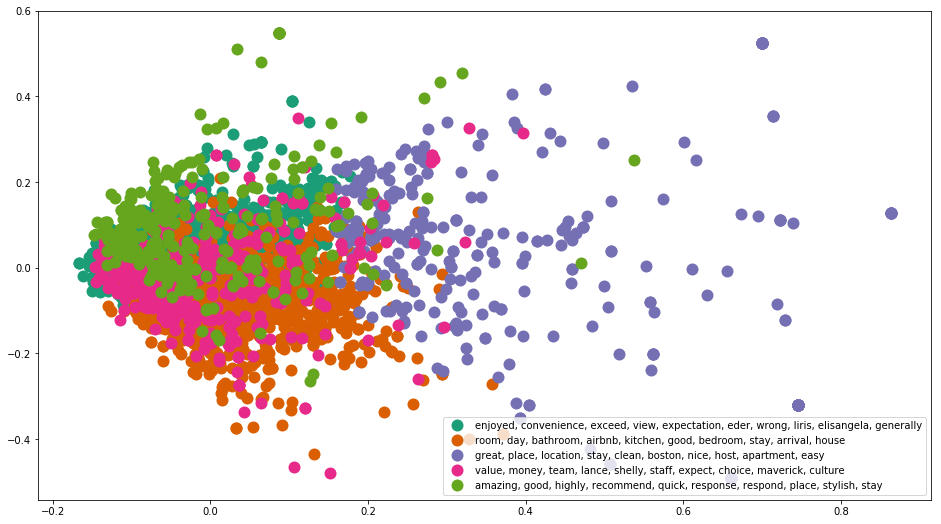

In [52]:
# %matplotlib inline 

#create data frame with PCA cluster results
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 
groups = df.groupby(clusters)

# set up plot
fig, ax = plt.subplots(figsize=(16, 9))
#Set color for each cluster/group
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], color=cluster_colors[name], 
            mec='none')

ax.legend(numpoints=1,loc=4)  #show legend with only 1 point, position is right bottom.

plt.show() #show the plot

In [53]:
plt.close()

## WordCloud

In [54]:
normalized_toy_corpus

['frank place great part east boston location nice quiet airport noise really bad pretty close blue line easy hop city great jog trail nearby pier park around corner beautiful super fancy apartment everything work order comfortable place stay think good value money since east boston still considerably cheap rest city overall recommend place',
 'partner stay frank apartment several month great experience frank accommodate thoughtful need give us good amount privacy location great quiet safe neighborhood would definitely stay area future thanks',
 'stay night hotel alternative complete confort sweet bed nice welcome close metro ideal place discovering trip town',
 'fiance could stay fort hill inn terry host welcoming well helpful leave us map suggestion thing room beautiful cozy clean neighborhood quiet great location easy short trip downtown stay future trip boston recommend family friend plan visit area',
 'place perfect clean comfortable conveniently locate really private cozy room mu

In [55]:
dic = {}

In [56]:
for i in range(len(normalized_toy_corpus)):
    for j in normalized_toy_corpus[i].split(' '):
        if j not in dic.keys():
            dic[j] = 0
        else:
            dic[j] = dic[j] + 1

In [57]:
import random
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [58]:
from wordcloud import WordCloud
#from pyecharts import WordCloud

import matplotlib.pyplot as plt
wordcloud = WordCloud(max_words=len(dic), background_color='white', relative_scaling=1,normalize_plurals=False).generate_from_frequencies(dic)

plt.imshow(wordcloud, interpolation='bilinear')
#plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3),interpolation="bilinear")
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [184]:
wordcloud.to_file('./wc.jpg')